In [36]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image, ImageOps

In [37]:
def get_image(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [38]:
def show_img(imgs):
    _ , ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(imgs[0], cmap='gray')
    ax[1].imshow(imgs[1], cmap='gray')
    plt.show()

In [39]:
import random

def rotate_and_noise_img(img):
    w, h = img.shape
    out_width = random.randint(w//2, w)
    out_height =  random.randint(h//2, h)
    rotated_img = np.rot90(img)
    row,col= rotated_img.shape
    mean = 0
    sigma = 15
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    out_img = rotated_img + gauss
    return out_img[:out_width][:out_height].astype('uint8')

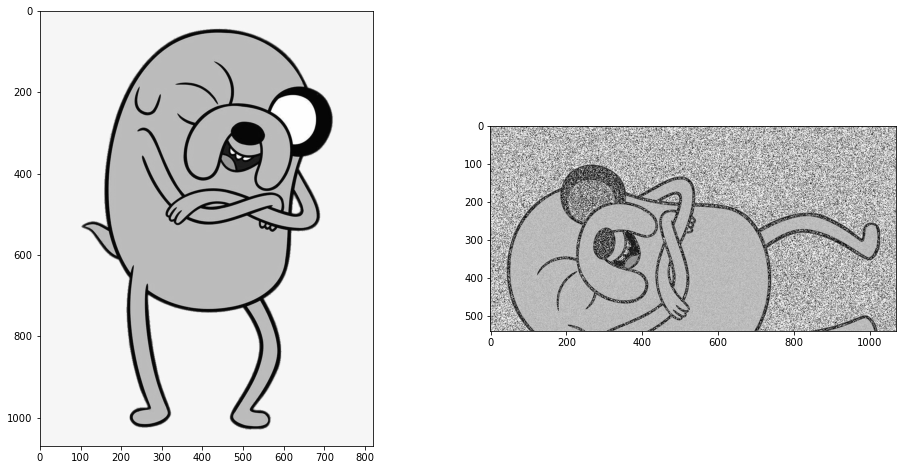

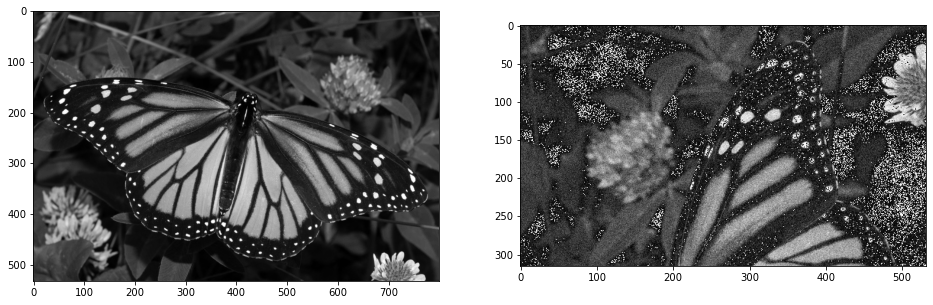

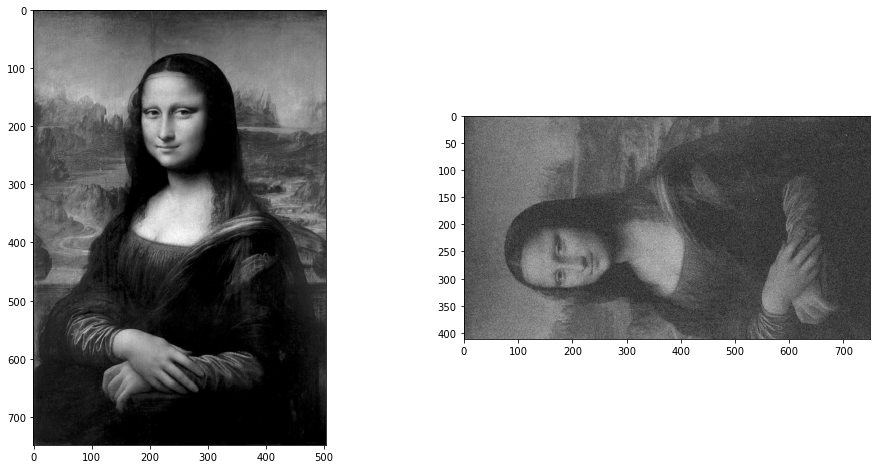

In [40]:
img_paths =['images/happy_jack.png', 'images/monarch_in_may.jpg', 'images/low_contrast.png']
images = []
for i, path in enumerate(img_paths):
    img = get_image(path)
    mutated_img = rotate_and_noise_img(img)
    images.append([img, mutated_img])
    show_img(images[i])


In [41]:
def sift(img):
    sift = cv2.SIFT_create() 
    return sift.detectAndCompute(img,None)

def draw_matches(img):
    dpi = 80
    print(img.shape)
    width, height, _ = img.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image
    
    ax.imshow(img, cmap='gray')
    plt.show()

def bf_match(imgs, dsc1, dsc2, kp1, kp2):
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  matches = bf.match(dsc1, dsc2)
  matches = sorted(matches, key = lambda x:x.distance)

  img = cv2.drawMatches(imgs[0], kp1, imgs[1], kp2, matches[:20], imgs[1], flags=2)
  draw_matches(img)

(1070, 1890, 3)


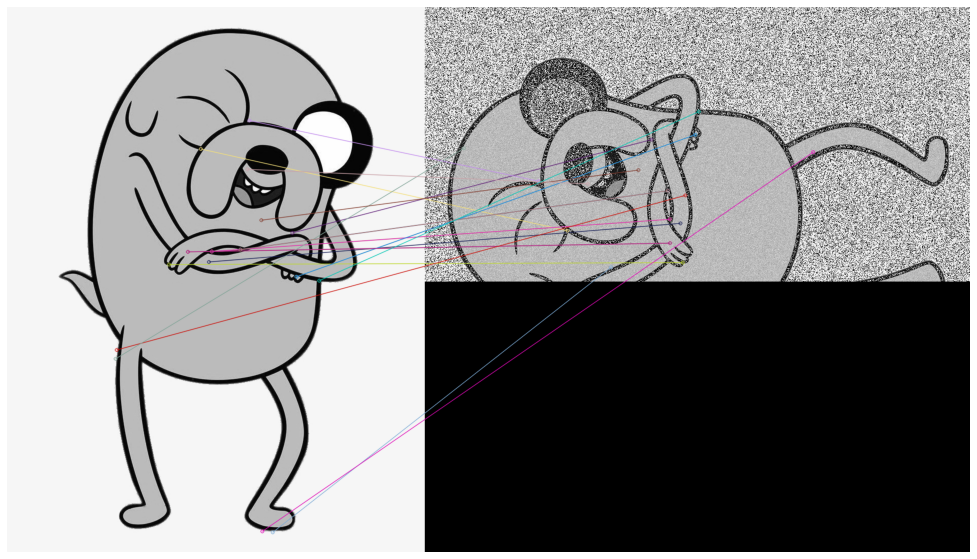

(532, 1332, 3)


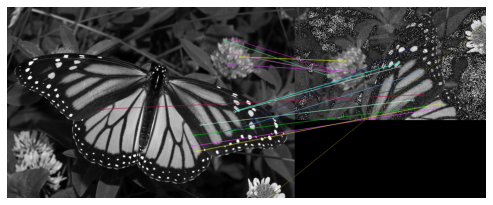

(749, 1253, 3)


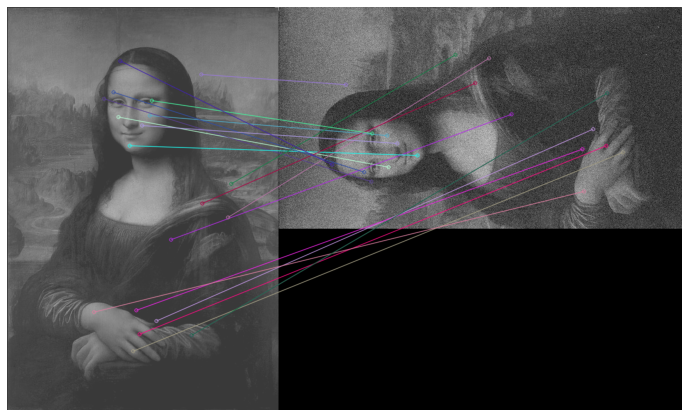

In [42]:
for i in range(len(images)):
    kp1, desc1 = sift(images[i][0])
    kp2, desc2 = sift(images[i][1])
    bf_match(images[i], desc1, desc2, kp1, kp2) 


In [43]:
def custom_match(dsc1, dsc2, kp1, kp2, imgs):
    matches = []

    for i, k1 in enumerate(dsc1):
        for j, k2 in enumerate(dsc2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x:x.distance)

    img = cv2.drawMatches(imgs[0], kp1, imgs[1], kp2, matches[:20], imgs[1], flags=2)
    draw_matches(img)

In [44]:
for i in range(len(images)):
    kp1, desc1 = sift(images[i][0])
    kp2, desc2 = sift(images[i][1])
    custom_match(images[i], desc1, desc2, kp1, kp2) 

ValueError: operands could not be broadcast together with shapes (1070,820) (128,) 